In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from CIoTS.generator import CausalTSGenerator
from CIoTS.pc_chen import pc_chen
from CIoTS.evaluation import evaluate_edges
from CIoTS.p_estimation import var_order_select
from CIoTS.stat_tools import partial_corr_test

In [35]:
dimensions = 3
max_p = 4
incoming_edges = 2

In [40]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [41]:
predicted_graph = pc_chen(partial_corr_test, ts, 4, 0.05)

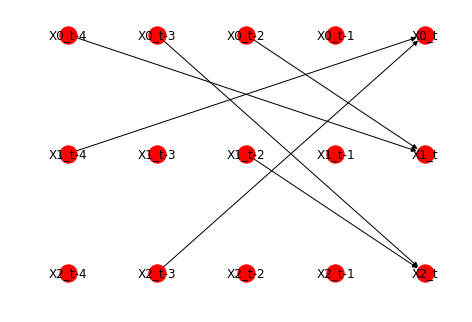

In [42]:
generator.draw_graph()

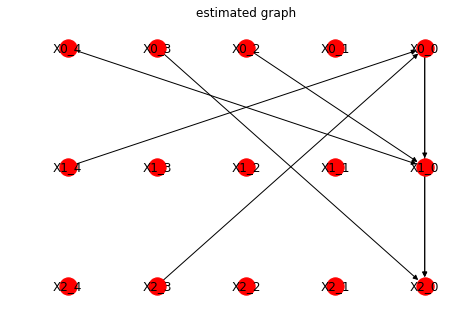

In [43]:
import re
positions = {}
for node in predicted_graph.nodes():
    i,j = re.search(r'X(\d+)_(\d+)', node).groups()
    positions[node] = (max_p-int(j), dimensions-int(i))

nx.draw(predicted_graph, pos=positions, with_labels=True)
plt.title("estimated graph")
plt.show()

In [44]:
pd.DataFrame(evaluate_edges(generator.graph, predicted_graph))

Exception: incomparable graphs

In [45]:
p_ranking, ic_scores = var_order_select(ts, max_p=5)

/Users/danthe/Projects/CIoTS/CIoTS/p_estimation.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data_matrix = ts.as_matrix()


LinAlgError: 2-th leading minor of the array is not positive definite

In [ ]:
pd.DataFrame(p_ranking)

In [ ]:
pd.DataFrame(ic_scores)